<a href="https://colab.research.google.com/github/Kaif10/ML-ALgorithms-from-scratch/blob/master/decision_tree_using_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree using Scikit-learn

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier



In [13]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)



Here max_leaf_nodes denote the max depth of the tree you want. 
Increasing the depth to a large number will result in overfitting to training data.

In [14]:
3define the classifier
estimator = DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)

#train
estimator.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [15]:
estimator.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

[Text(133.92000000000002, 195.696, 'X[3] <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(66.96000000000001, 152.208, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(200.88000000000002, 152.208, 'X[2] <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(133.92000000000002, 108.72, 'X[3] <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(66.96000000000001, 65.232, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(200.88000000000002, 65.232, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.84000000000003, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 108.72, 'gini = 0.05\nsamples = 39\nvalue = [0, 1, 38]')]

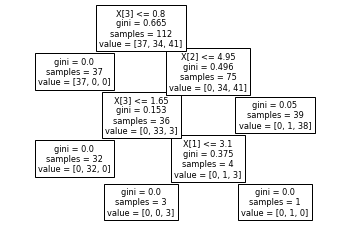

In [16]:
from sklearn import tree
tree.plot_tree(estimator) 

In [17]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, estimator.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        13
     class 1       1.00      0.94      0.97        16
     class 2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [20]:
count_same = 0
count_diff = 0
for i in range(38):
  if  y_test[i] == estimator.predict(X_test)[i]:
    count_same +=1
  else:
    count_diff += 1
print("The no. of values that are diffferent of predictions and real data: ", count_diff)
print("The no. of values that are same of predictions and real data: ", count_same)

The no. of values that are same of predictions and real values:  1
The no. of values that are same of predictions and real values:  37


Another great way to plot decision trees is by using graphviz library

In [21]:
import graphviz 
dot_data = tree.export_graphviz(estimator, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                     special_characters=True)  

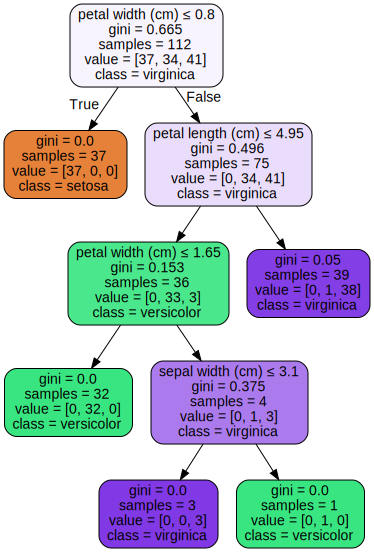

In [22]:
 graph = graphviz.Source(dot_data)  
 graph 